In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/song_data_no_duplicates.xlsx')
df.head()

Unnamed: 0    Track Name                              Artists  \
0           0  Kaikai Kitan  [('Eve', '58oPVy7oihAEXE0Ott6JOf')]   
1           1    Dramaturgy  [('Eve', '58oPVy7oihAEXE0Ott6JOf')]   
2           2     FightSong  [('Eve', '58oPVy7oihAEXE0Ott6JOf')]   
3           3      Bokurano  [('Eve', '58oPVy7oihAEXE0Ott6JOf')]   
4           4      Insomnia  [('Eve', '58oPVy7oihAEXE0Ott6JOf')]   

                   Album Name                Album ID                Track ID  \
0  Kaikai Kitan / Ao No Waltz  6BZjN6j79mjz7PJfGmvCR1  6y4GYuZszeXNOXuBFsJlos   
1                       Bunka  2rrihVXNDB7FSe6EFs2inI  72uSoNIf7eScfGZFQjNHrR   
2                   FightSong  6rpUs50OKVNUGDDusbHvET  37vujUbX37xoBmwoddMYck   
3                    Bokurano  0dS6KlBzeDJQsWZ2Krmjhh  7F3R31tU4vNWrdsjNrURQX   
4                    Insomnia  51QJlvJclfVB6jNNXlDatS  52KxsRBZj7Ip9HdxgvEQbO   

   Popularity Release Date  Duration (ms)  Explicit  ... Energy  Key  \
0          72   2020-12-23         221426     False  ...  0.911    5   
1          62   2017-12-20         238181     False  ...  0.900    3   
2          60   2022-12-28         208964     False  ...  0.966    6   
3          60   2023-01-08         212708     False  ...  0.841    1   
4          57   2024-03-01         204916     False  ...  0.831    9   

   Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  \
0    -3.515     0       0.0900      0.011900          0.000000    0.1190   
1    -1.730     0       0.0741      0.019200          0.000000    0.1720   
2    -4.046     1       0.0952      0.000382          0.000001    0.3490   
3    -5.245     1       0.0813      0.001050          0.000000    0.1770   
4    -3.881     0       0.0809      0.000666          0.000000    0.0885   

   Valence    Tempo  
0    0.606   92.502  
1    0.706  149.018  
2    0.752  125.913  
3    0.526  182.971  
4    0.585   75.046  

[5 rows x 22 columns]

AttributeError: module 'matplotlib' has no attribute 'tight_layout'

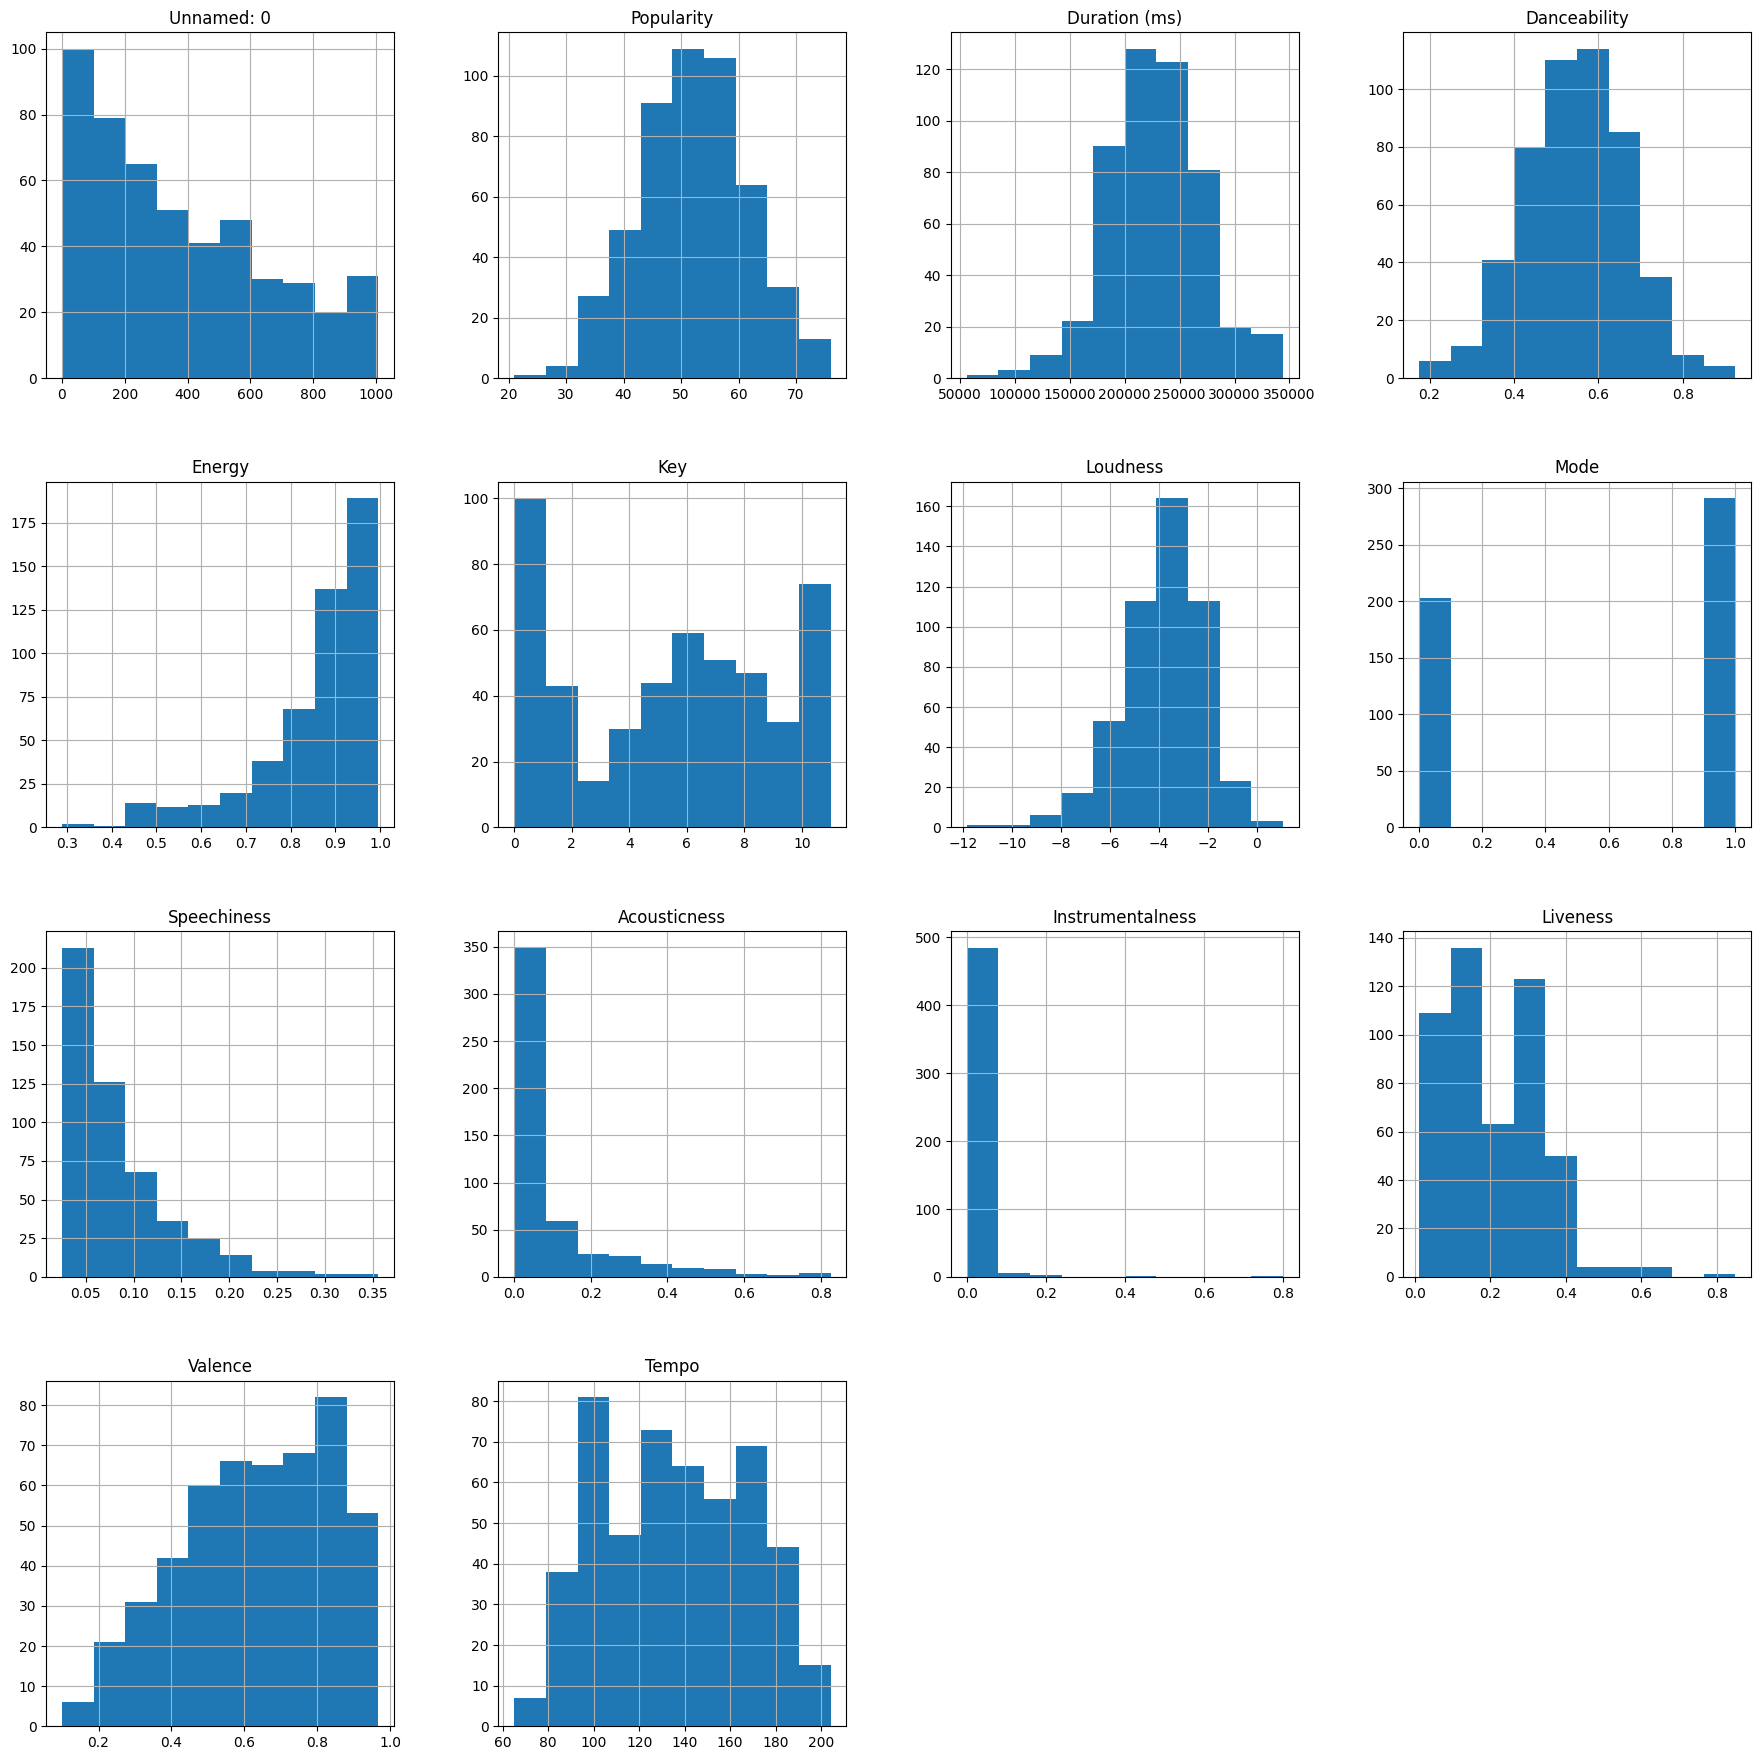

In [ ]:
import matplotlib as plt

df.hist(figsize = (22,22))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
df = df.dropna()

# Normalize numerical features
numerical_features = ["Popularity", "Duration (ms)", "Danceability", "Energy", "Key", "Loudness", "Mode", "Speechiness", "Acousticness", "Liveness", "Valence", "Tempo"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encode categorical features
label_encoders = {}
categorical_features = ["Track Name", "Artists", "Album Name", "Album ID", "Track ID"]
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Separate features and target variable
X = df.drop(columns=["Unnamed: 0", "Track Name", "Artists", "Album Name", "Album ID", "Track ID", "External URLs", "Release Date"])

In [ ]:
def get_initial_ratings():
    # Example of hardcoded ratings for 5 random songs
    return {
        '6y4GYuZszeXNOXuBFsJlos': 8,  # Track ID: Rating
        '72uSoNIf7eScfGZFQjNHrR': 7,
        '37vujUbX37xoBmwoddMYck': 9,
        '3VB2Q9iWutZLTiBYNcNFHO': 6,
        '52KxsRBZj7Ip9HdxgvEQbO': 10
    }

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Assume you have a function to get user ratings for the initial 5 songs
initial_ratings = get_initial_ratings()  # Dictionary with Track ID and rating

# Extract the initial rated songs' features
# print(initial_ratings.keys())
initial_songs_features = X.loc[df['Track ID'].isin(initial_ratings.keys())]
print(initial_songs_features)

# Fit k-NN model
knn = NearestNeighbors(n_neighbors=10, algorithm='auto')
knn.fit(X)

# Find recommendations
distances, indices = knn.kneighbors(initial_songs_features)

# Recommend top 5 songs based on the closest neighbors
recommended_songs = df.iloc[indices.flatten()]['Track Name'].unique()[:10]
print("Recommended Songs:", recommended_songs)
recommended_songs = df.iloc[indices.flatten()]['Track ID'].unique()[:10]
print("Recommended Songs:", recommended_songs)

    Popularity  Duration (ms)  Explicit  Danceability    Energy       Key  \
0     2.150966      -0.149638     False      0.306285  0.406038 -0.128171   
1     1.075809       0.241727     False      0.372066  0.322151 -0.706404   
2     0.860778      -0.440726     False     -0.326858  0.825477  0.160945   
4     0.538231      -0.535280     False     -0.409084 -0.204054  1.028295   
17    0.000653       0.928595     False     -0.129515  0.642449  0.739179   

    Loudness      Mode  Speechiness  Acousticness  Instrumentalness  Liveness  \
0   0.177753 -1.197288     0.125955     -0.529575          0.000000 -0.714849   
1   1.249866 -1.197288    -0.170215     -0.480047          0.000000 -0.296827   
2  -0.141178  0.835221     0.222815     -0.607719          0.000001  1.099209   
4  -0.042075 -1.197288    -0.043551     -0.605792          0.000000 -0.955409   
17 -0.014447  0.835221    -0.518539     -0.598167          0.000000  1.485682   

     Valence     Tempo  
0  -0.126538 -1.348857  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


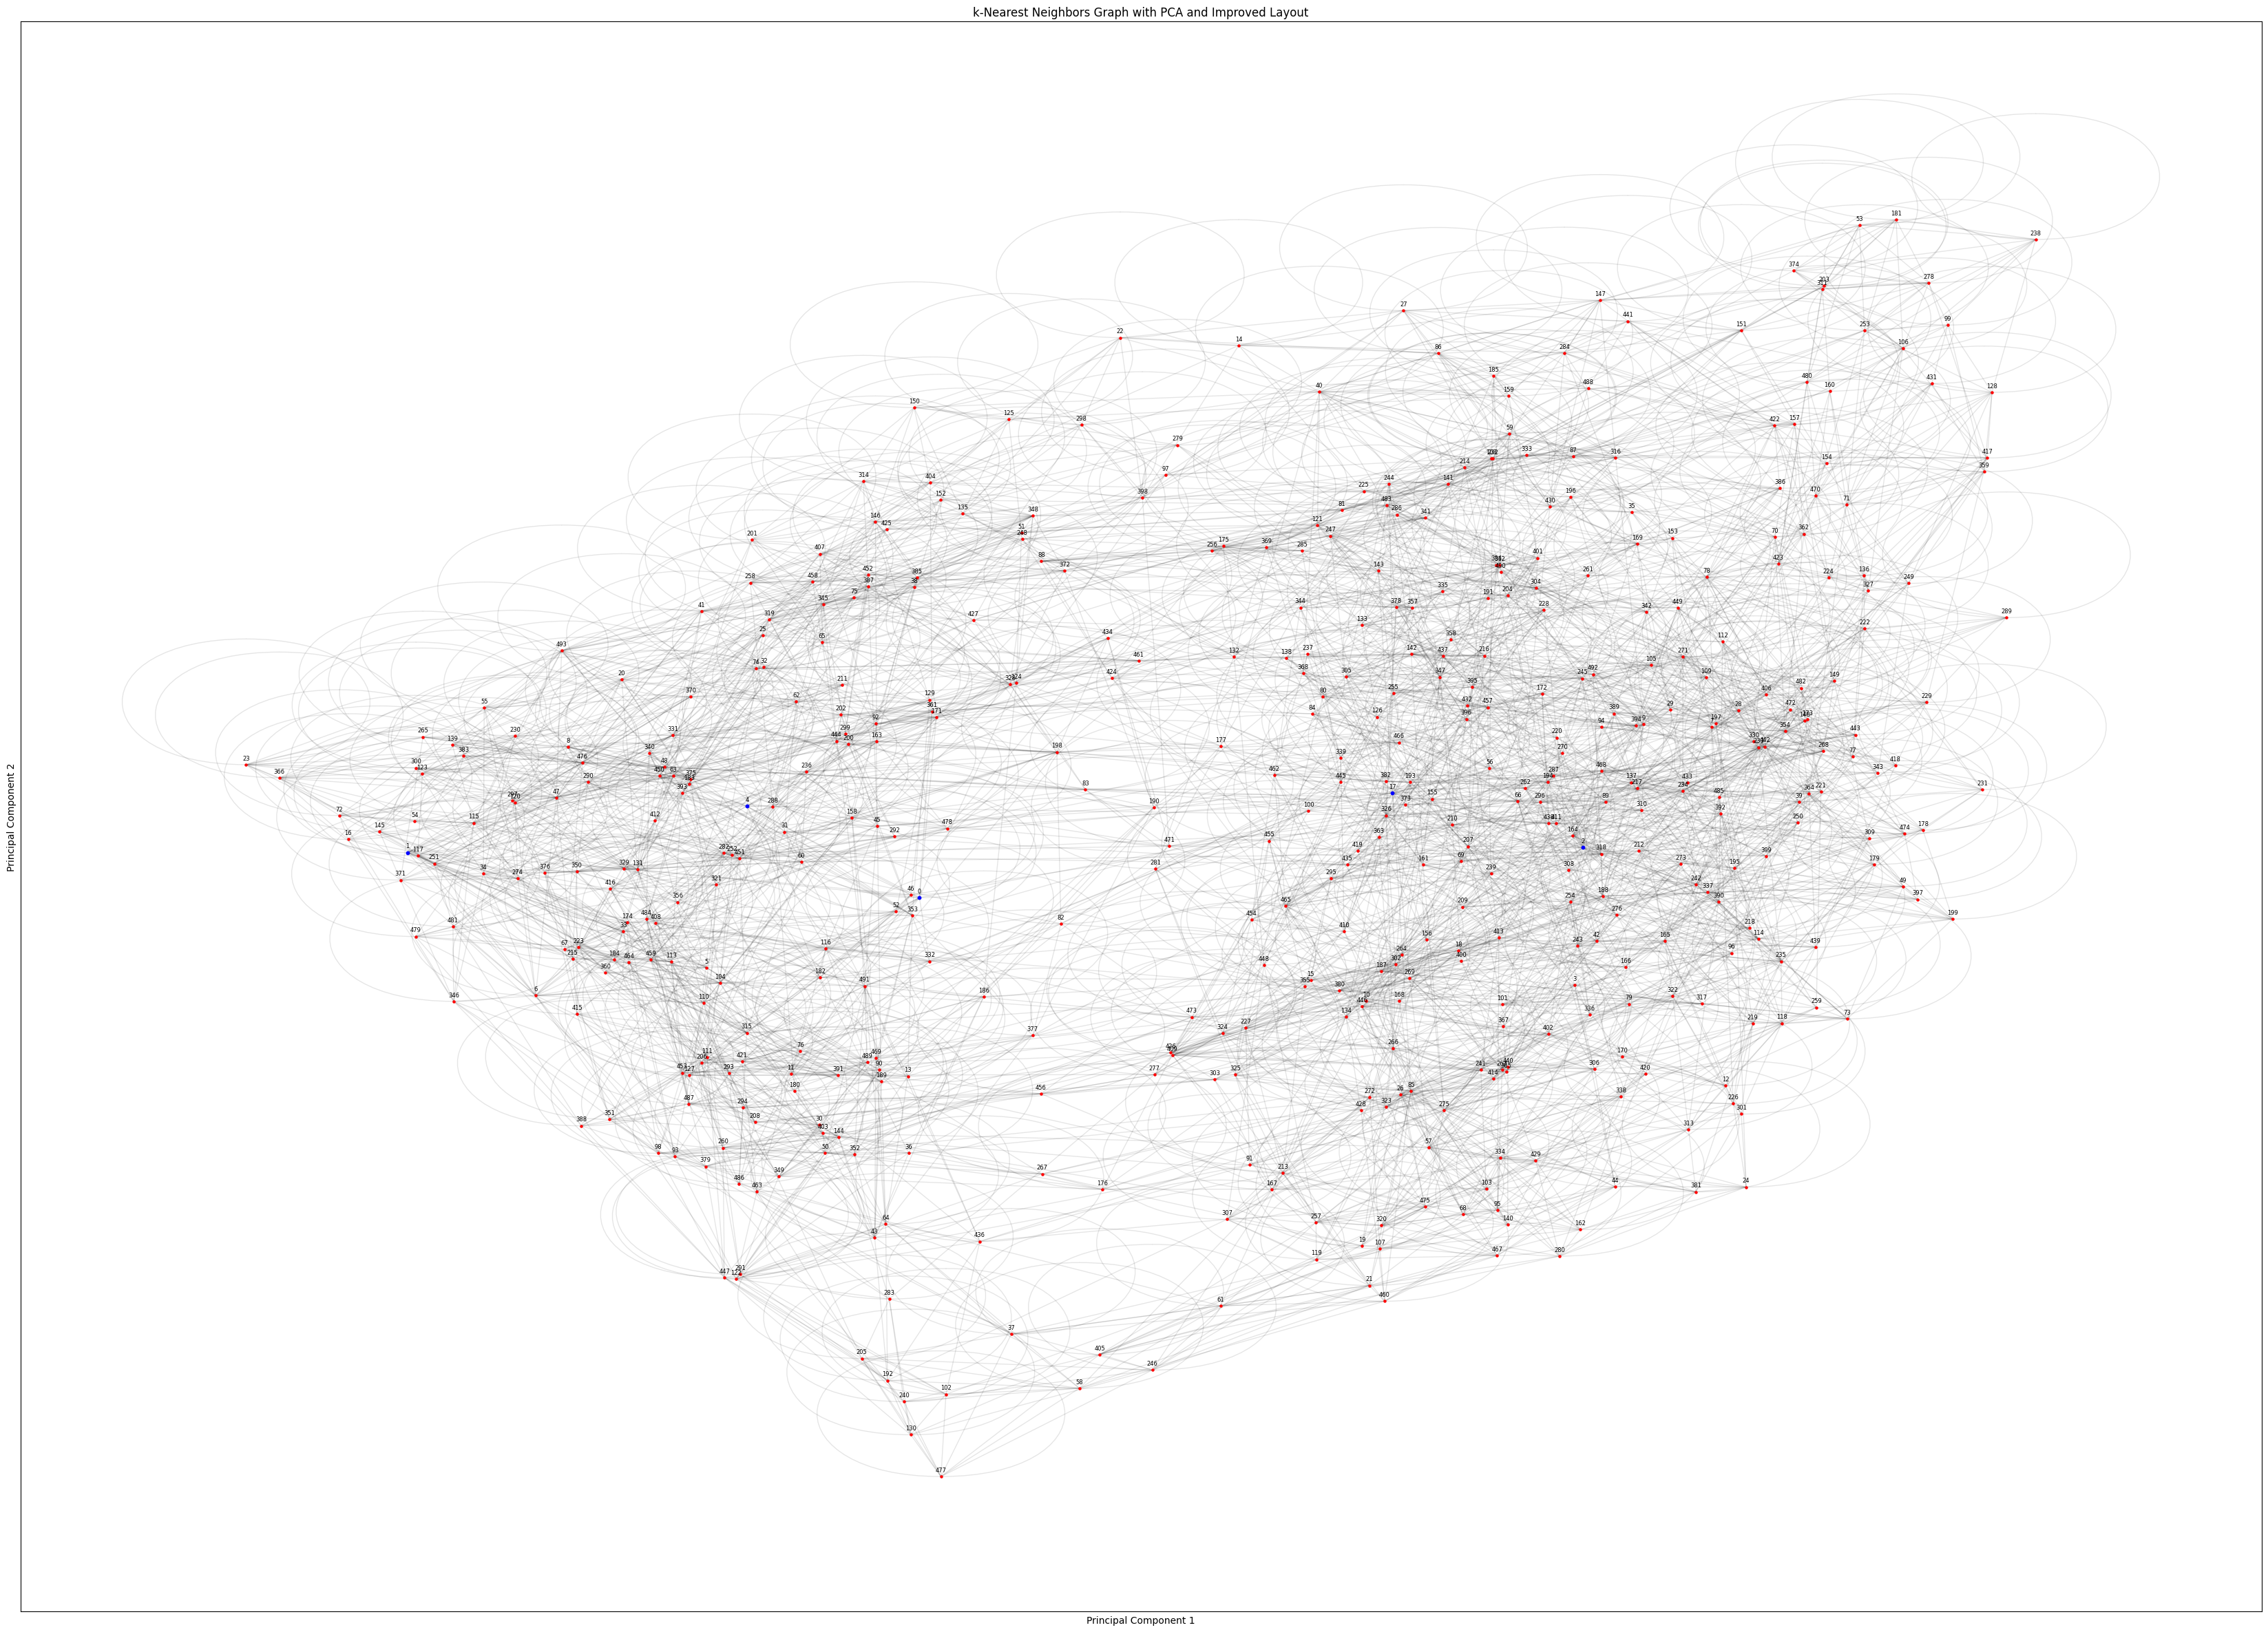

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA

kneighbors_graph = knn.kneighbors_graph(X.values).toarray()
G = nx.from_numpy_array(kneighbors_graph)
pos = {i: (X.iloc[i, 0], X.iloc[i, 1]) for i in range(X.shape[0])}  # Positions for all nodes

# plt.figure(figsize=(8, 6))
# nx.draw(G, pos, with_labels=False, node_size=5, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')

# # Plot the points
# plt.scatter(X['Popularity'], X['Danceability'], color='red', zorder=5)
# for i, (x, y) in enumerate(zip(X['Popularity'], X['Danceability'])):
#     plt.text(x, y, f'({x}, {y})', fontsize=12, ha='right')

# Step 3: Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.values)

# Step 4: Create the graph with NetworkX
G = nx.from_numpy_array(kneighbors_graph)

# Step 5: Visualize the graph with Matplotlib using PCA-transformed data
pos = {i: (X_pca[i, 0], X_pca[i, 1]) for i in range(X_pca.shape[0])}  # Positions for all nodes

plt.figure(figsize=(42, 30))
# Using a force-directed layout
pos = nx.spring_layout(G, pos=pos)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='red')

nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 17, 4], node_size=10, node_color='blue')

# Draw edges with transparency
nx.draw_networkx_edges(G, pos, alpha=0.1)

label_pos = {key: (value[0], value[1] + 0.01) for key, value in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=6, font_color='black')

plt.title("k-Nearest Neighbors Graph with PCA and Improved Layout")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# plt.title("k-Nearest Neighbors Graph")
# plt.xlabel("Popularity")
# plt.ylabel("Danceability")
# plt.grid(True)
# plt.show()